In [60]:
import pandas  as pd 
import numpy as np 
import matplotlib as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r'food_Analysis\Data\indian_food.csv')

In [62]:
df

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


In [63]:
veg_mean = df.loc[(df["diet"] == "vegetarian") & (df["prep_time"] != -1), "prep_time"].mean()

In [64]:
nonveg_mean = df.loc[(df["diet"] == "non vegetarian") & (df["prep_time"] != -1), "prep_time"].mean()

In [65]:
df.loc[(df["diet"] == "vegetarian") & (df["prep_time"] == -1), "prep_time"] = veg_mean

C:\Temp\ipykernel_20156\419174753.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '34.79126213592233' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df["diet"] == "vegetarian") & (df["prep_time"] == -1), "prep_time"] = veg_mean


In [66]:
df.loc[(df["diet"] == "non vegetarian") & (df["prep_time"] == -1), "prep_time"] = nonveg_mean

In [67]:
print(df["prep_time"].describe())

count    255.000000
mean      35.593123
std       71.608579
min        5.000000
25%       10.000000
50%       15.000000
75%       30.000000
max      500.000000
Name: prep_time, dtype: float64


In [68]:
df

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.000000,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.000000,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.000000,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.000000,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.000000,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5.000000,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20.000000,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,34.791262,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20.000000,45,sweet,dessert,Madhya Pradesh,Central


In [77]:
df1 = df[~(df['prep_time'] == -1)]

In [70]:
df1['diet'].value_counts()

diet
vegetarian        226
non vegetarian     29
Name: count, dtype: int64

In [71]:
grouped0 = df1.groupby(['diet'])['prep_time'].mean()

In [72]:
grouped0

diet
non vegetarian    41.842105
vegetarian        34.791262
Name: prep_time, dtype: float64

In [73]:
test = df[df['prep_time'] == -1].groupby(['diet'])['prep_time'].count()

In [74]:
test

Series([], Name: prep_time, dtype: int64)

In [75]:
grouped = df.groupby(['diet'])['prep_time'].mean()

In [76]:
grouped

diet
non vegetarian    41.842105
vegetarian        34.791262
Name: prep_time, dtype: float64

<Axes: >

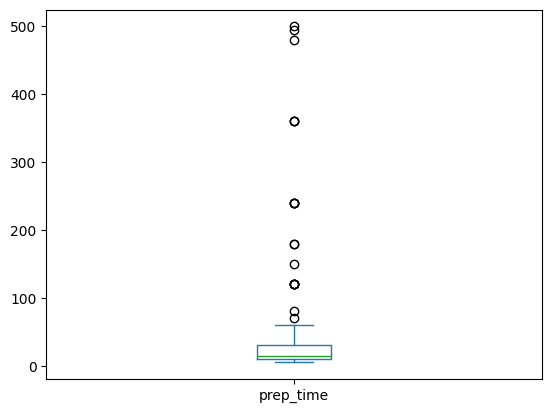

In [78]:
df['prep_time'].plot(kind='box')